#### Introduction
Large language models (LLMs) have demonstrated remarkable capabilities across many language tasks, even ones challenging for native speakers, such as translation. However, to properly assess these models' abilities, we need standardized evaluation methods.
While basic language competency - producing coherent, grammatically correct text across languages - has largely been mastered by state-of-the-art LLMs, more nuanced aspects of language understanding remain challenging. One such frontier is the comprehension of metaphorical expressions, idioms, and figures of speech.

Consider the Danish expression "stå med håret i postkassen". Literally, it means "stand with your hair in the letter box". But its actual meaning is "to be in a problematic situation where one feels powerless, possibly as a result of being disappointed, betrayed, or deceived." Its most closely-related English counterpart would be an idiom like "* be hung out to dry*" or "left holding the bag". Understanding such expressions requires pattern recognition across languages and exposure to sufficient examples in training data, making them an interesting benchmark for evaluating an LLM's pattern-matching capabilities.

This raises interesting questions about LLMs developed primarily by US-based companies. How well do their pattern-matching abilities generalize to non-English metaphorical expressions in, say, Danish? To address this, the Danish Language and Literature Society (DSL), in collaboration with the Danish Agency for Digital Government, has created the talemaader-dataset - a collection of 1,000 Danish metaphorical expressions designed to evaluate models through multiple-choice questions. Thanks to the dataset curated by DSL, and the advent of LLM APIs that allow us to quickly and cheaply use models programmatically, we can now measure how well different LLMs identify the correct meanings of Danish expressions based on their training data.

This project evaluates ten different LLMs on the talemaader-dataset. Specifically, the Claude (versions 3-3.7) and Chat-GPT (v3.5-4o) model families as well as Gemini (v1.5), Llama (v3.1), Grok (v2) and DeepSeek (v3).

OpenAI's GPT-3 from 2020 and its improved version GPT-3.5 from 2023 are used as baselines since they are the smallest and oldest LLMs. But, as you will see below, even though they are "old" LLMs (at least in the rapidly evolving field of machine learning), they are definitely not incapable, and the results may surprise!

Let's have a look!

Trying path: ..\results\figures\LLM_model_accuracy_comparison.png


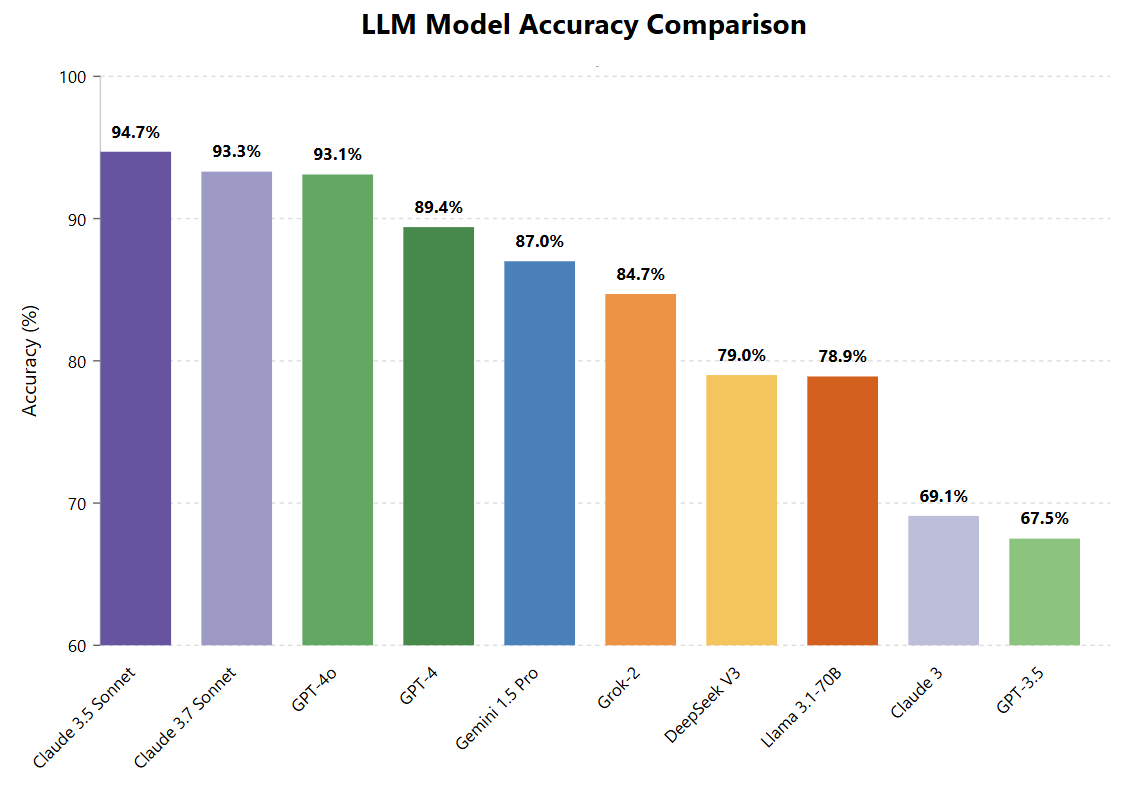

In [10]:
import os
from IPython.display import Image

image_path = os.path.join('..', 'results', 'figures', 'LLM_model_accuracy_comparison.png')
print(f"Trying path: {image_path}")

Image(filename=image_path)

#### Accuracy
The above figure shows the accuracy scores for ten different LLMs when faced with the task of predicting the correct definition of Danish idioms from the talemaader-dataset.

Claude 3.5 Sonnet achieved the highest accuracy at 94.7%, correctly identifying the definitions of nearly 950 out of 1000 Danish idioms. This is followed closely by Claude 3.7 Sonnet at 93.3% and GPT-4o at 93.1%, both demonstrating exceptional pattern-recognition capabilities on this task. Interestingly, **Claude 3.7 performed worse than Claude 3.5 in spite of being a new model.**

GPT-4 follows with a strong performance at 89.4%, while Gemini 1.5 Pro reaches 87.0%. Grok-2 achieves 84.7%, placing it in the middle tier of the tested models.

DeepSeek-V3 and Llama 3.1-70B performed similarly, with accuracies of 79.0% and 78.9% respectively. The original Claude 3 shows notably lower performance at 69.1%, with GPT-3.5 at the bottom with 67.5%.

Interestingly, the Claude family shows the widest performance gap between versions, with the 3.5 Sonnet model outperforming the base Claude 3 by over 25 percentage points. This suggests significant improvements in Claude's pattern-matching abilities for non-English idiomatic expressions between these versions. This feat is made further impressive when you consider the fact that this progress in the Claude model performance has been achieved in, quite literally, one year. Version 3 was published on March 14 2024 and, at the time of writing this, it is March 14 2025.  

#### Examples and error analysis
So, is there any rhyme and reason to the types of misinterpretations the LLMs generally make? That's what we will look at in the section below

Let's take a look at the types of misinterpretations below.

As we can see in the charts above, there is a prevalence for the models to predict either a wrong concrete or abstract definition.

I would argue that even though they do not correctly predict the label, the prevalence of the LLMS to pick a concrete or abstract definition of the expression instead of random definition (random definitions is picked under 10% of the time by 4/6 of the models) it is a sign of some sort language competency and understanding - even though it does not correctly predict the label.

The amount of wrong predictions rose from 327=>347 when introdced one-shot prompting (from previous zero-shot) for GPT-3. I only introduced the second part of the below prompt, but this introduced more errors. So, giving the GPT-3 model an example actually made it worse at predicting the correct label. My immediate guess as to why is that since the meaning in metaphorical expressions is indirect, by adding this second part of the prompt, it introduced a flair of context to the response - and not just described the process, which was the goal - thereby introducing some noise to the model's predictions.

    PROMPT_TEMPLATE = """Choose the correct definition for the given metaphorical expression by responding with only a single letter representing your choice (A, B, C, or D).
    Sentence: {metaphorical_expression}
    Option A: {definition_a}
    Option B: {definition_b}
    Option C: {definition_c}
    Option D: {definition_d}
    Your response should be exactly one letter: A, B, C, or D."""

        

#### Prompt tweaking
 removed 'metaphorical' from GPT-4o and wrong predictions only went from 70 => 72